## **Final Project 2: Logistic Regression and SVM**

This project was created to fulfill the assignment of The Introduction of Python for Data Science Course

### **Our Members** ###

- Caesariansyah Dwi Fadhilah
- Muhammad Reza Pahlevi
-

## **A. Introduction** 

 Understanding and accurately predicting weather conditions are pivotal for various aspects of our daily lives, impacting everything from outdoor plans to agricultural practices. In this context. Australia's climate varies greatly across its eight states and territories. Most of Australia has four seasons, while the dry and wet seasons take place in the tropical regions in the north of the continent. Because the country is so large, the climate in Australia differs greatly from region to region. In general, there are four seasons in most of the country, while the Top End (including Darwin, Katherine, Kakadu and Arnhem Land), Broome, Kimberley and Tropical North Queensland (Cairns, Whitsundays and Daintree Rainforest) experience a 'wet season' (November to April) and a 'dry season' (May to October). The wet season in northern Australia is characterized by very hot days, high humidity, monsoon rains and possibly cyclones, but also by its own charms.

 There fore,  we delve into a dataset spanning around 10 years, collecting daily weather observations from diverse locations across Australia. The primary objective is to predict next-day rain using classification models trained on the target variable, "RainTomorrow." This variable serves as the linchpin for prediction, addressing a straightforward yet impactful question: did it rain the next day, with responses categorized as "Yes" or "No"? Notably, the column is marked as "Yes" if the recorded rainfall on that day measures 1mm or more.

 To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from predicting next-day rain in Australia. This dataset consists of 145,460 rows and 23 columns.


## **B. Import Libraries**

The libraries are needed to build a linear regression model include numpy. sympy, seaborn, matplotlib, dython nominal, joblib, sklearn, and pickie.

In [128]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations
import missingno as msno

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["ggplot"])

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import pickle
from pickle import dump,load

## **C. Data Loading**

### **Import Dataset**

Import weatherAUS.csv as df. And the required of dataset will be read by the program.

In [129]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Display the number of rows and columns.

In [130]:
df.shape

(145460, 23)

### **Type of Data**

Display summary information about the DataFrame.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Change Date of data type from object to datetime

In [132]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

Summary of descriptive statistics from DataFrame

In [133]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,145460,2013-04-04 21:08:51.907053568,2007-11-01 00:00:00,2011-01-11 00:00:00,2013-06-02 00:00:00,2015-06-14 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,143975.0,12.194034,-8.5,7.6,12.0,16.9,33.9,6.398495
MaxTemp,144199.0,23.221348,-4.8,17.9,22.6,28.2,48.1,7.119049
Rainfall,142199.0,2.360918,0.0,0.0,0.0,0.8,371.0,8.47806
Evaporation,82670.0,5.468232,0.0,2.6,4.8,7.4,145.0,4.193704
Sunshine,75625.0,7.611178,0.0,4.8,8.4,10.6,14.5,3.785483
WindGustSpeed,135197.0,40.03523,6.0,31.0,39.0,48.0,135.0,13.607062
WindSpeed9am,143693.0,14.043426,0.0,7.0,13.0,19.0,130.0,8.915375
WindSpeed3pm,142398.0,18.662657,0.0,13.0,19.0,24.0,87.0,8.8098
Humidity9am,142806.0,68.880831,0.0,57.0,70.0,83.0,100.0,19.029164


Descriptive statistics specific to object columns

In [134]:
df.describe(include='object').T

,count,unique,top,freq
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


Check Duplicated of Data

In [135]:
df.duplicated().sum()

0

Check Missing Values

<Axes: >

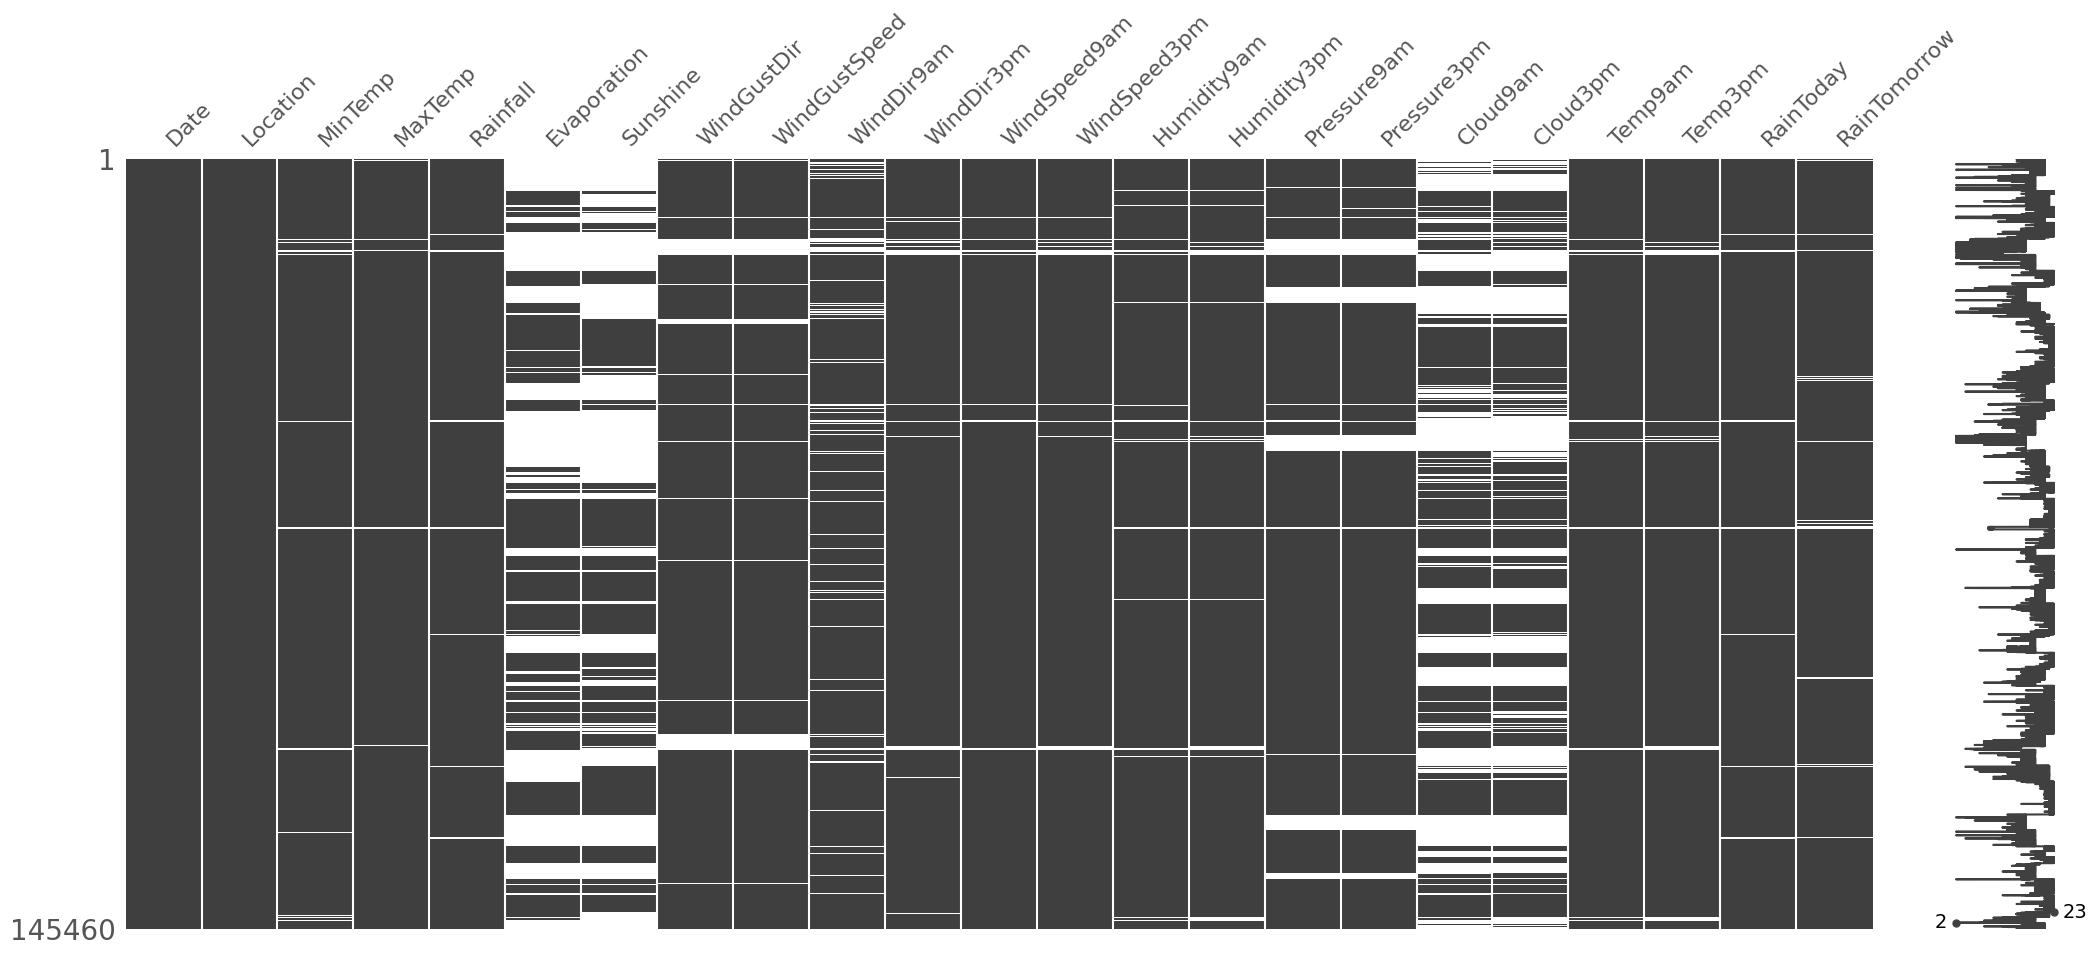

In [136]:
# Missing Values visualization by missingno
msno.matrix(df)

In [137]:
# Check Missing Values
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
Sunshine,float64,69835,48.009762,145,3.6
Evaporation,float64,62790,43.166506,358,14.0
Cloud3pm,float64,59358,40.807095,10,8.0
Cloud9am,float64,55888,38.421559,10,7.0
Pressure9am,float64,15065,10.356799,546,988.0
Pressure3pm,float64,15028,10.331363,549,1032.5
WindDir9am,object,10566,7.263853,16,NNW
WindGustDir,object,10326,7.098859,16,E
WindGustSpeed,float64,10263,7.055548,67,83.0
Humidity3pm,float64,4507,3.098446,101,2.0


We can see that columns of Sunshine, Evaporation, Cloud3pm, and Clod9am have a high percentage of missing values which is above 30%. Furthermore, the columns will be dropped so that the prediction has a higher accuracy later.

## **D. Data Cleaning**

### **Drop Columns with High Missing Values**

As it can be seen from the missing values above, sunshine, evaporation, cloud3pm, and cloud9am features have lots of NaN values. Replacing those might increase the inaccuracy of the dataset. Thus, those features can be dropped instead. Furthermore, date feature can be dropped as well because this isn't a time series analysis.

In [138]:
df.drop(df[['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']], axis=1, inplace=True)

### **Handling Missing Values**

Display the names of columns that fall into the non-numeric category and the columns that fall into the numeric category.

In [139]:
num = df.columns[df.dtypes == float]
cat = df.columns[df.dtypes == object]

print(f"Numerical Columns\t({len(num)})\t: {list(num)}")
print(f"Categorical Columns\t({len(cat)})\t: {list(cat)}")

Numerical Columns	(12)	: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Categorical Columns	(6)	: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Fill the missing values in each numeric column with the mean value of that respective column, and also fill the missing values in each categorical column (object) with the mode value of that respective column.

In [140]:
print("Numerical Columns")
for i in num:
    df[i] = df[i].fillna(df[i].mean())
    print(f"NaN values in {i} have been replaced by {round(df[i].mean(),3)}")

print("\nCategorical Columns")
for i in cat:
    df[i] = df[i].fillna(df[i].mode().values[0])
    print(f"NaN values in {i} have been replaced by {df[i].mode().values[0]}")

Numerical Columns
NaN values in MinTemp have been replaced by 12.194
NaN values in MaxTemp have been replaced by 23.221
NaN values in Rainfall have been replaced by 2.361
NaN values in WindGustSpeed have been replaced by 40.035
NaN values in WindSpeed9am have been replaced by 14.043
NaN values in WindSpeed3pm have been replaced by 18.663
NaN values in Humidity9am have been replaced by 68.881
NaN values in Humidity3pm have been replaced by 51.539
NaN values in Pressure9am have been replaced by 1017.65
NaN values in Pressure3pm have been replaced by 1015.256
NaN values in Temp9am have been replaced by 16.991
NaN values in Temp3pm have been replaced by 21.683

Categorical Columns
NaN values in Location have been replaced by Canberra
NaN values in WindGustDir have been replaced by W
NaN values in WindDir9am have been replaced by N
NaN values in WindDir3pm have been replaced by SE
NaN values in RainToday have been replaced by No
NaN values in RainTomorrow have been replaced by No


Count of the null values for each column.

In [141]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### **Removing Outliers**

To get more accurate results later, it is necessary to remove outliers. A function will be created to detect outliers and visualize the outliers first

In [142]:
# Function to Visualize Outliers
def create_boxplot(num1,num2,data,x_axis):
    nrows,ncols = num1,num2

    fig,ax=plt.subplots(nrows,ncols,figsize=(25,15),dpi=200)

    n = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.boxplot(data=data,x=x_axis[n],ax=ax[i,j])
            ax[i,j].set_title(f"Box Plot of {x_axis[n]}")
            n += 1

    plt.tight_layout()
    plt.show()

# Function to Detect Outliers
def find_outlier(data):
    q1 = np.quantile(data,0.25)
    q3 = np.quantile(data,0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)
    
    outlier = []
    for i in data:
        if (i < min_iqr) or (i > max_iqr):
            outlier.append(i)
    
    return outlier

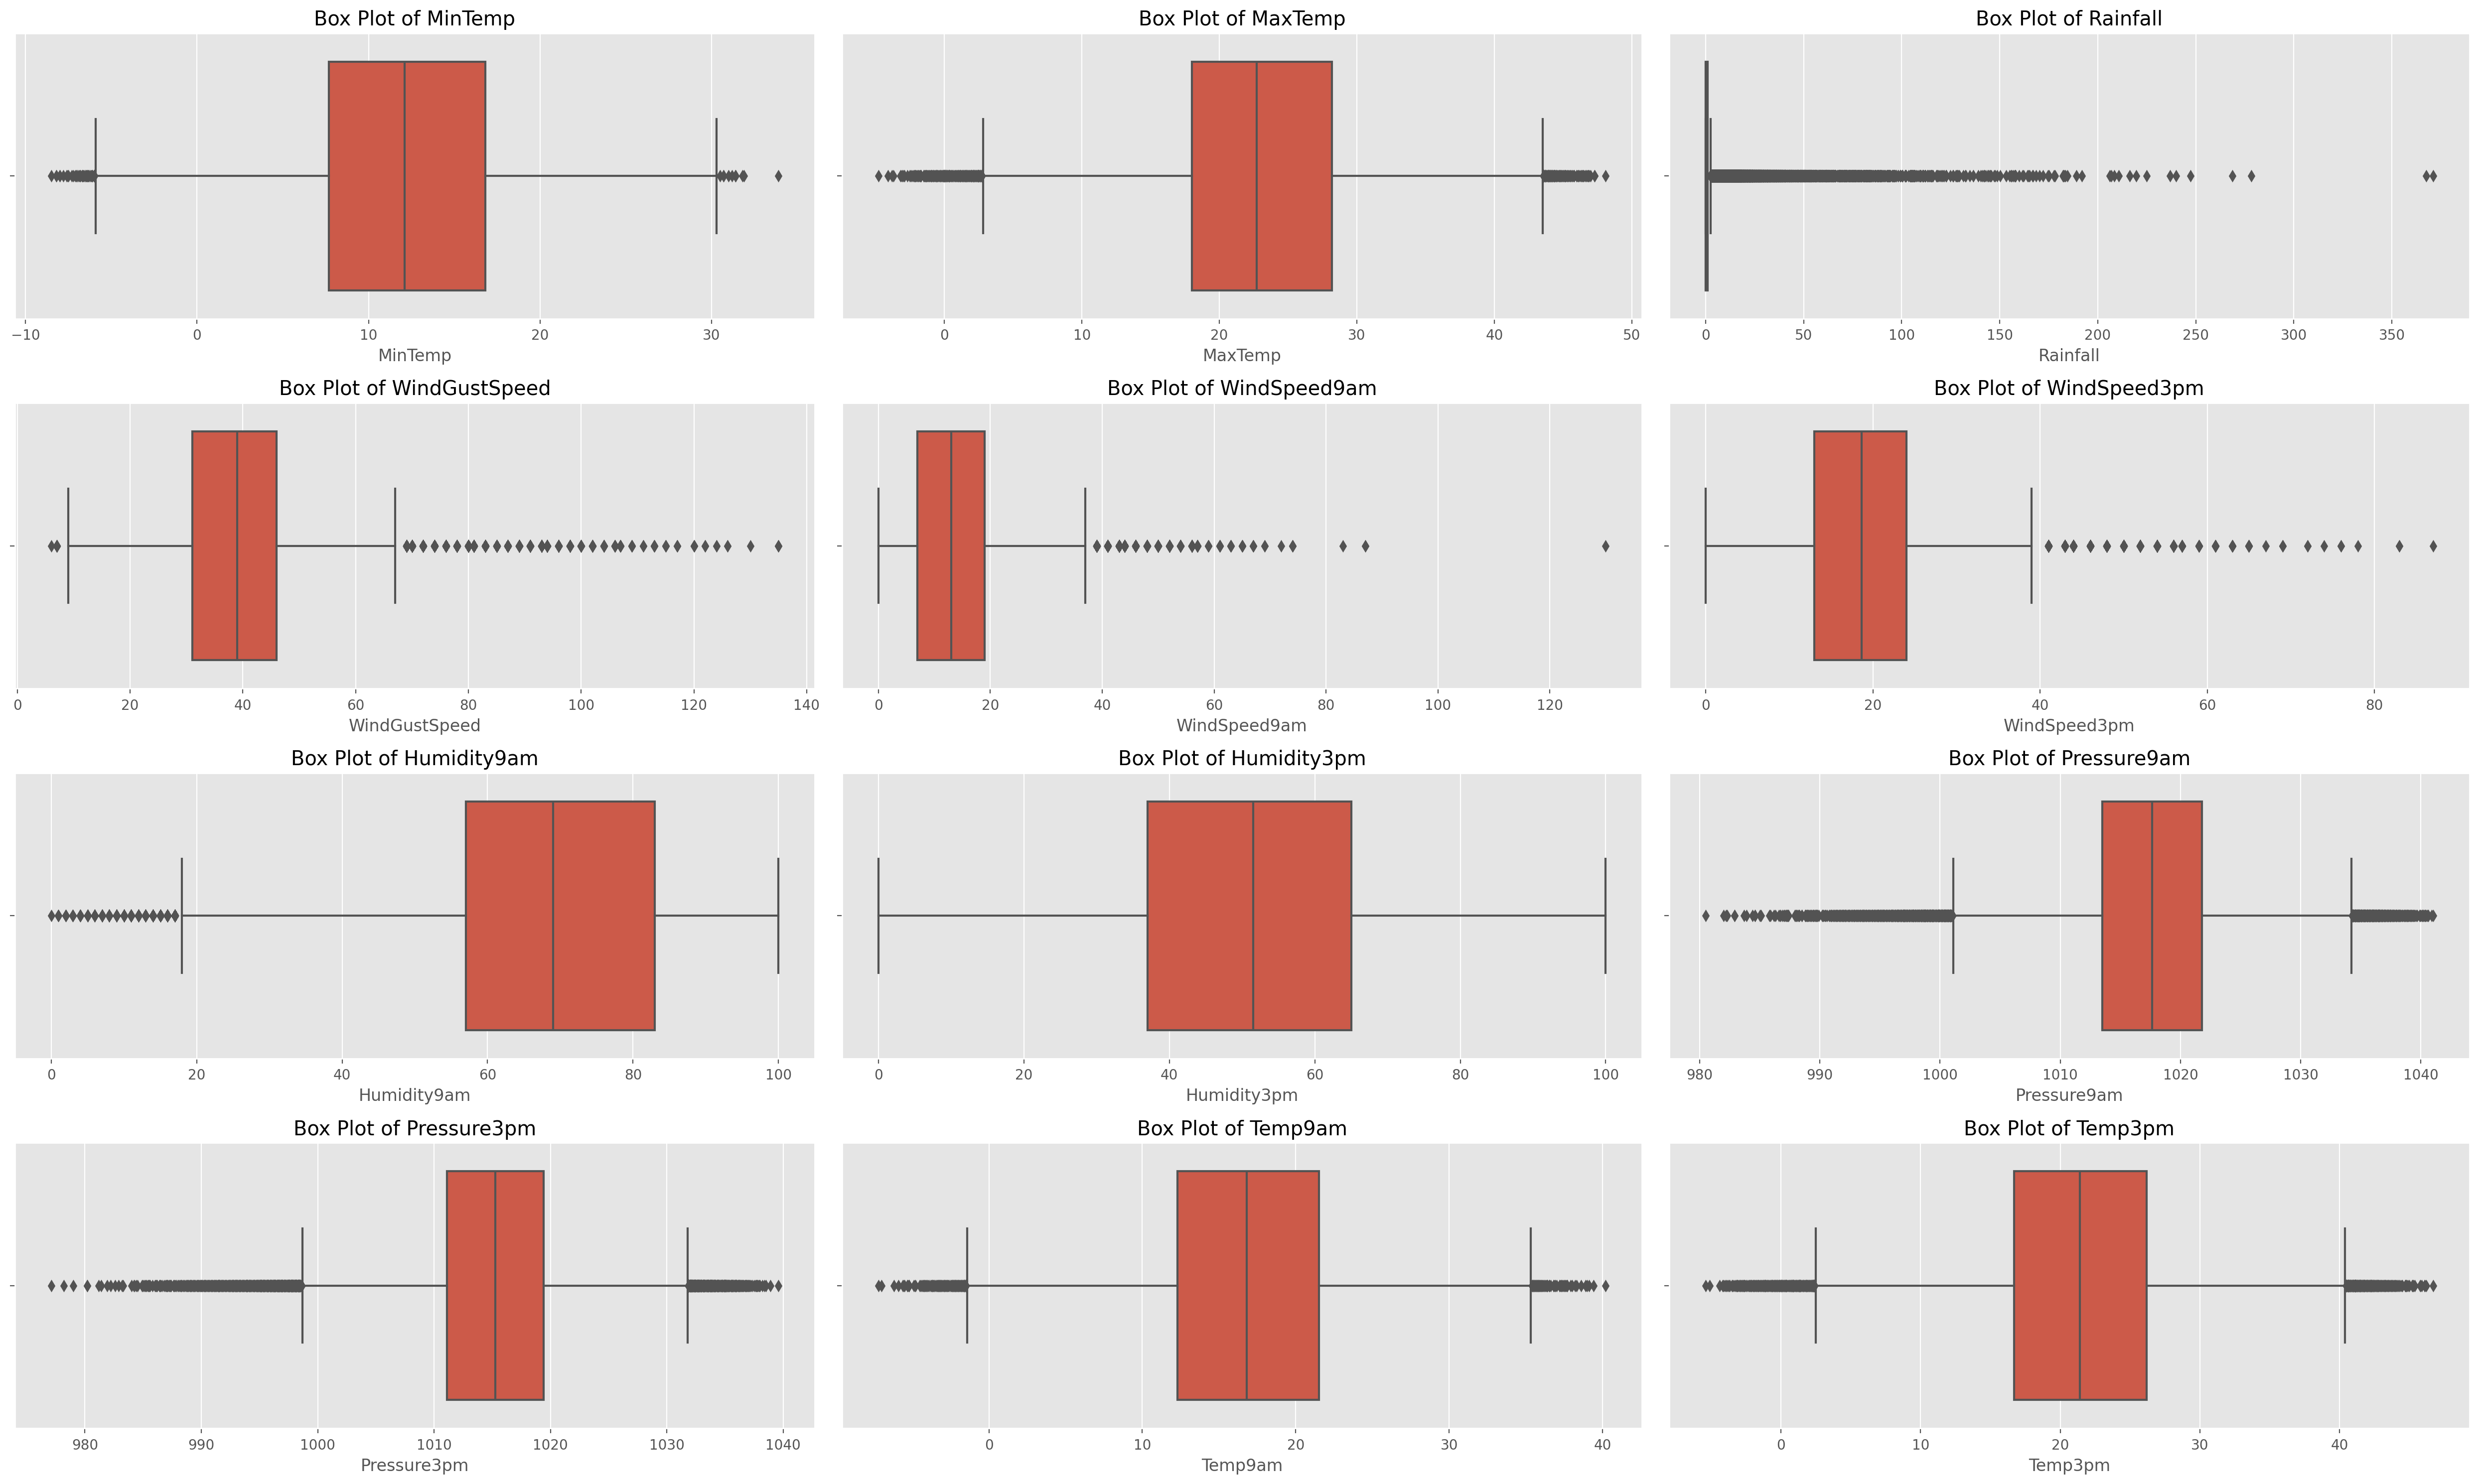

,outliers,percentage
Rainfall,23723,16.308951
WindGustSpeed,5523,3.796920
Pressure9am,2758,1.896054
Pressure3pm,2524,1.735185
WindSpeed3pm,2523,1.734497
WindSpeed9am,1817,1.249141
Humidity9am,1425,0.979651
Temp3pm,988,0.679225
MaxTemp,544,0.373986
Temp9am,307,0.211055


In [143]:
# Visualize Outliers
create_boxplot(4,3,df,num)

# Detect Outliers
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num]]) / len(df) * 100
}).set_index(num).sort_values("outliers",ascending=False)


It can be seen from the graphic above, that the outliers are quite high so removing outliers is needed to get more accurate results later. Removing outliers is done with the IQR (Interquartile Range) method.

In [144]:
# Removing outliers with IQR Method
for i in num :
    q1 = np.quantile(df[i],0.25)
    q3 = np.quantile(df[i],0.75)
    
    iqr = q3 - q1
    min_iqr = q1 - (1.5 * iqr)
    max_iqr = q3 + (1.5 * iqr)

    df = df[(df[i] >= min_iqr) & (df[i] <= max_iqr)]

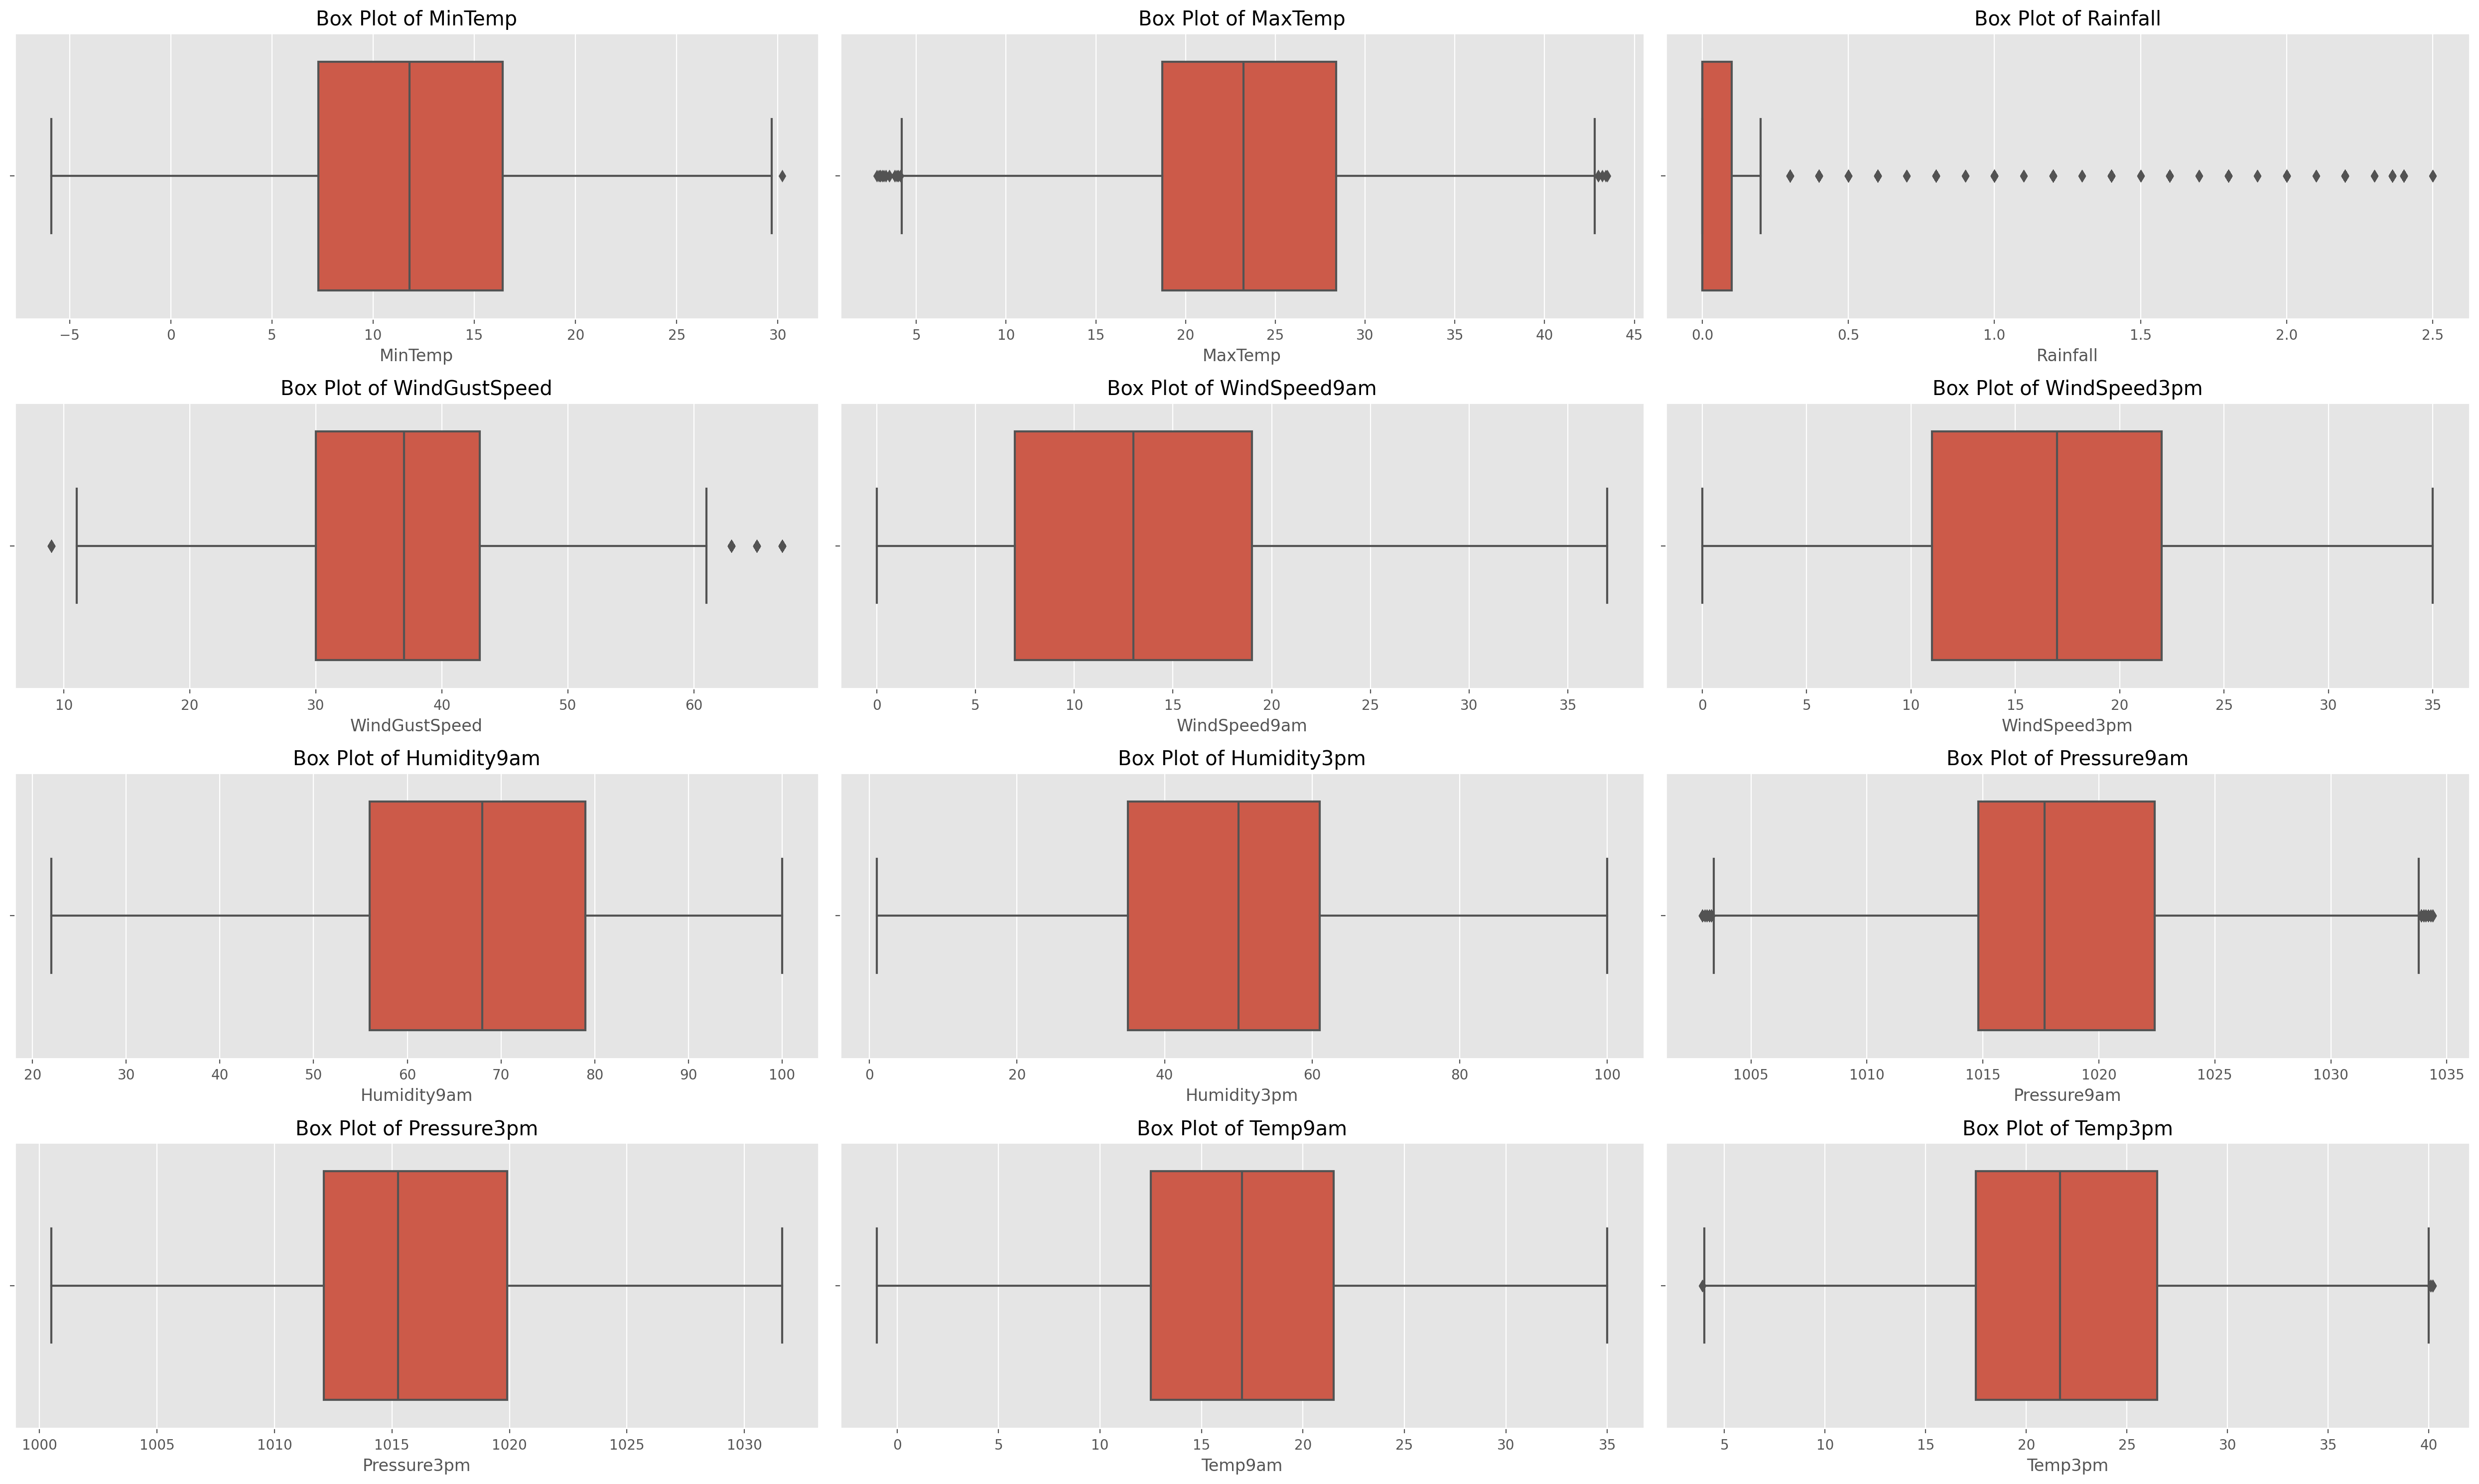

,outliers,percentage
Rainfall,19371,17.598321
WindGustSpeed,1531,1.390895
Pressure9am,283,0.257102
Temp3pm,33,0.029980
MaxTemp,20,0.018170
MinTemp,1,0.000908
WindSpeed9am,0,0.000000
WindSpeed3pm,0,0.000000
Humidity9am,0,0.000000
Humidity3pm,0,0.000000


In [145]:
# Visualize again after removing outliers
create_boxplot(4,3,df,num)

# Display it back, after removing outliers
pd.DataFrame({
    "outliers":[len(j) for j in [find_outlier(df[i]) for i in num]],
    "percentage":np.array([len(j) for j in [find_outlier(df[i]) for i in num]]) / len(df) * 100
}).set_index(num).sort_values("outliers",ascending=False)

## **E. Exploration Data Analysis**

Percentage of tomorrow will be rain, based on rain today

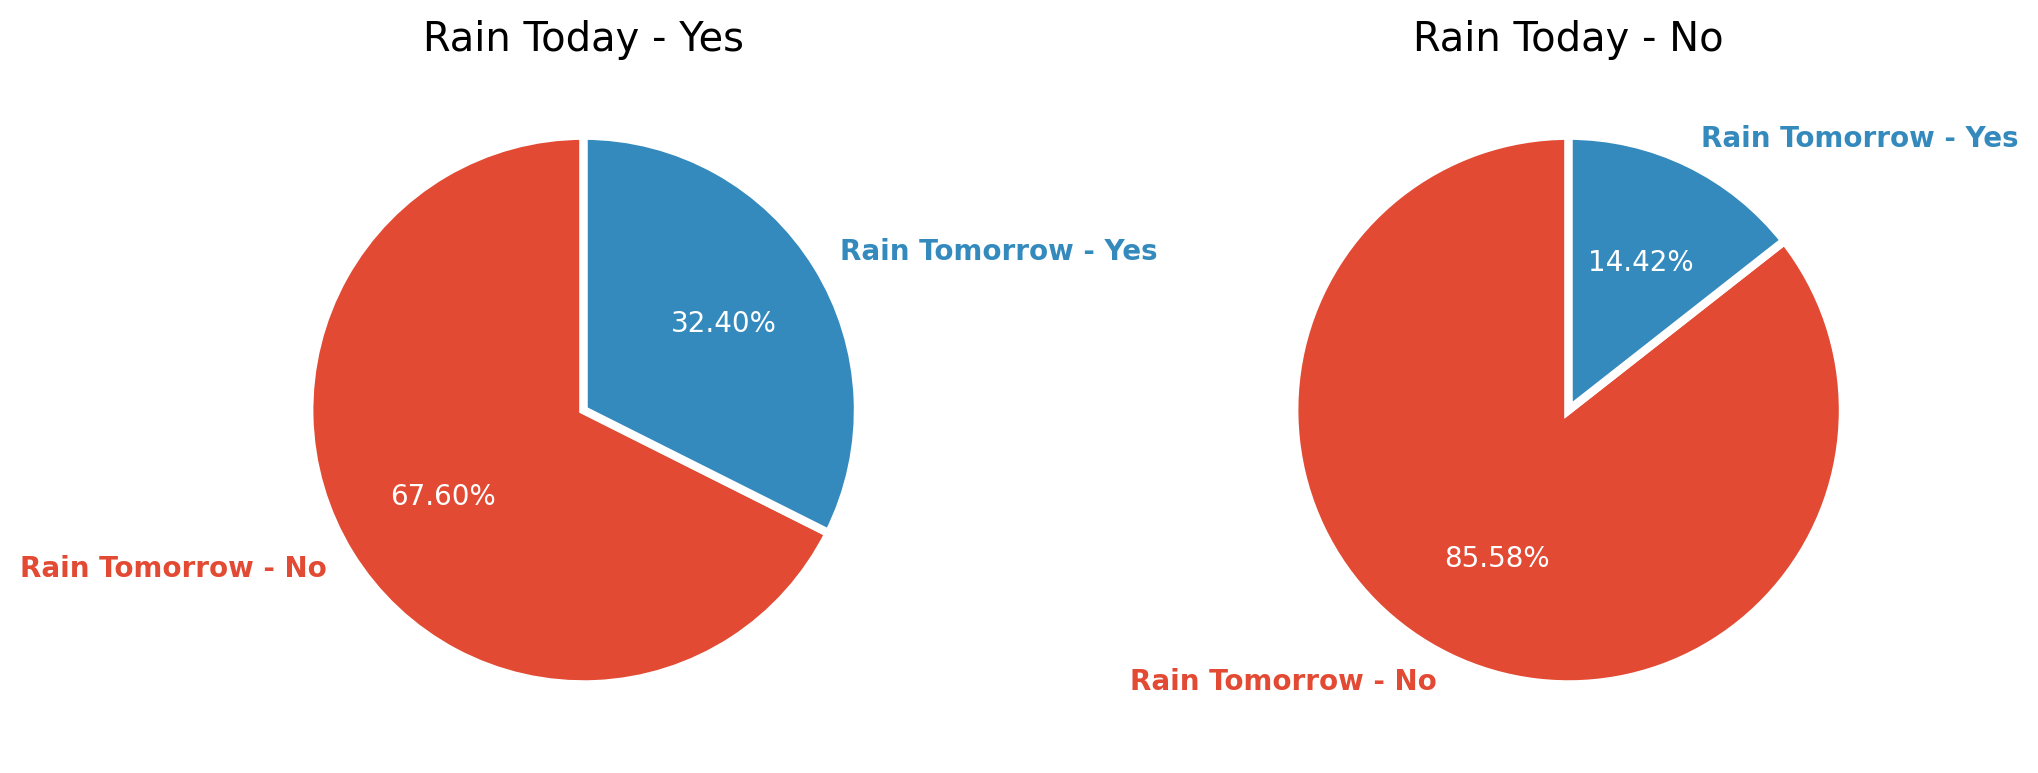

In [146]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")
    
plt.tight_layout()
plt.show()

Calculates the percentage of rain tomorrow based on whether or not it rained today. It can be seen in the pie chart above that if it is raining today, the chance of rain tomorrow is higher than if it is not raining today. Vice versa, if it is not raining today, the chance of it not raining tomorrow is higher than if it is raining today.

### **Rainfall Distribution in Each Season**

In [147]:
# Create get_season function as follows:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create column season that includes apply function get_season to the column Date Month 
df['Season'] = df['Date'].dt.month.apply(get_season)

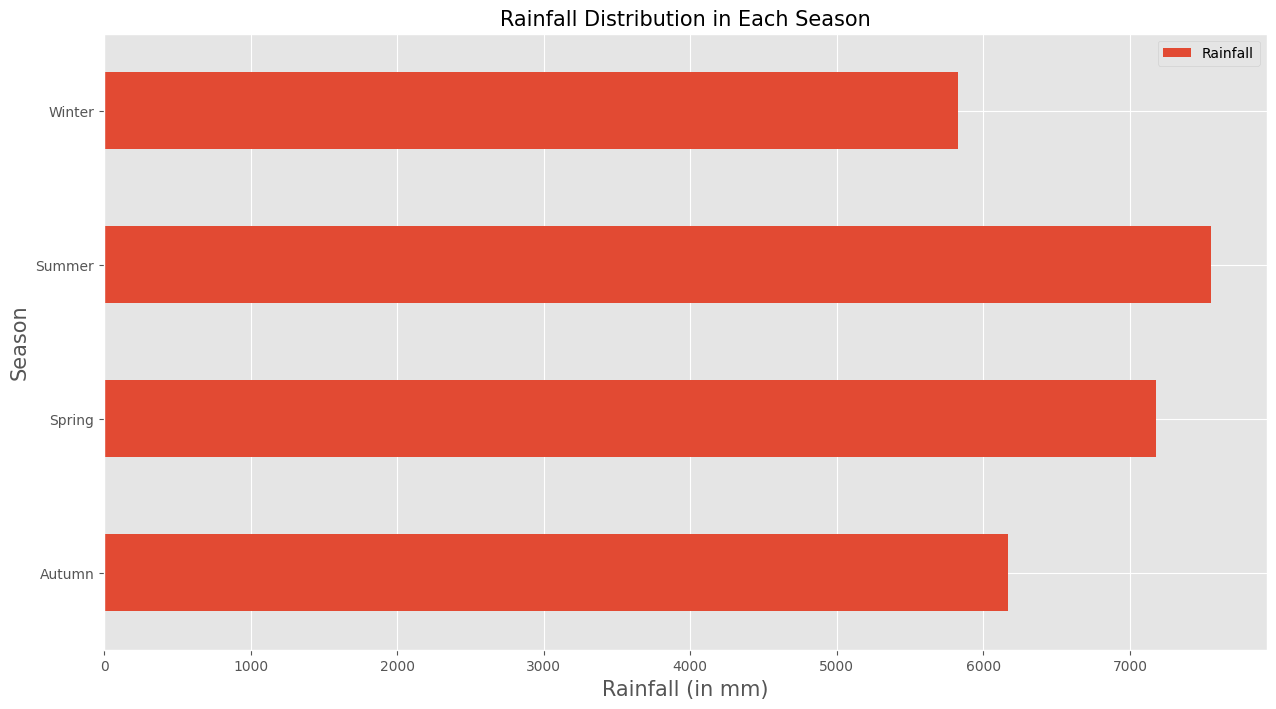

In [148]:
# Visualization Rainfall Distribution in Each Season
rainfall =[df['Rainfall'],df['Season']]
headers = ['Rainfall','Season']
rainfall_df = pd.concat(rainfall, axis=1, keys=headers)
r = rainfall_df.groupby('Season').agg({'Rainfall':'sum'})
r.plot(kind='barh')
plt.title('Rainfall Distribution in Each Season', fontsize=15)
plt.ylabel('Season', fontsize=15)
plt.xlabel('Rainfall (in mm)', fontsize=15)
plt.show()

# Drop column season
df.drop(df[['Season']],axis=1,inplace=True)

From the bar chart above, it can be seen that the highest rainfall distribution is in the summer season of 7554.4 mm, followed by spring (7178.2 mm), autumn (6169.9), then winter (5829.7 mm).

### **Hows the Humidity at 9am and 3pm in 4 years (2014-2017)**

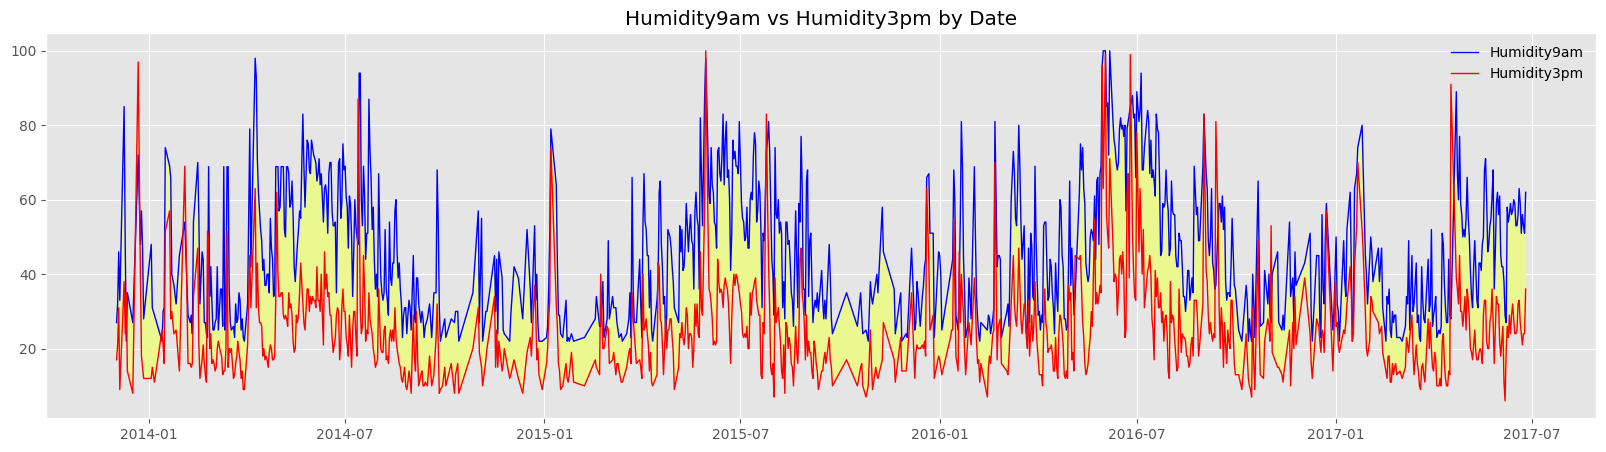

In [149]:
# Humadity visualization based on date
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Humidity9am'],color='blue',linewidth=1, label= 'Humidity9am')
plt.plot(df_dateplot['Date'],df_dateplot['Humidity3pm'],color='red',linewidth=1, label= 'Humidity3pm')
plt.fill_between(df_dateplot['Date'],df_dateplot['Humidity9am'],df_dateplot['Humidity3pm'], facecolor = '#EBF78F')
plt.title('Humidity9am vs Humidity3pm by Date')
plt.legend(loc='upper right', frameon=False)
plt.show()

From the visualization results above, it can be seen that there is a difference between the humidity at 9 am and 3 pm, where the humidity at 9 am tends to be higher than the humidity at 3 pm. It can also be seen that the humidity is high around June-July.

### **Which location has the most Minimum and Maximum Temperature**

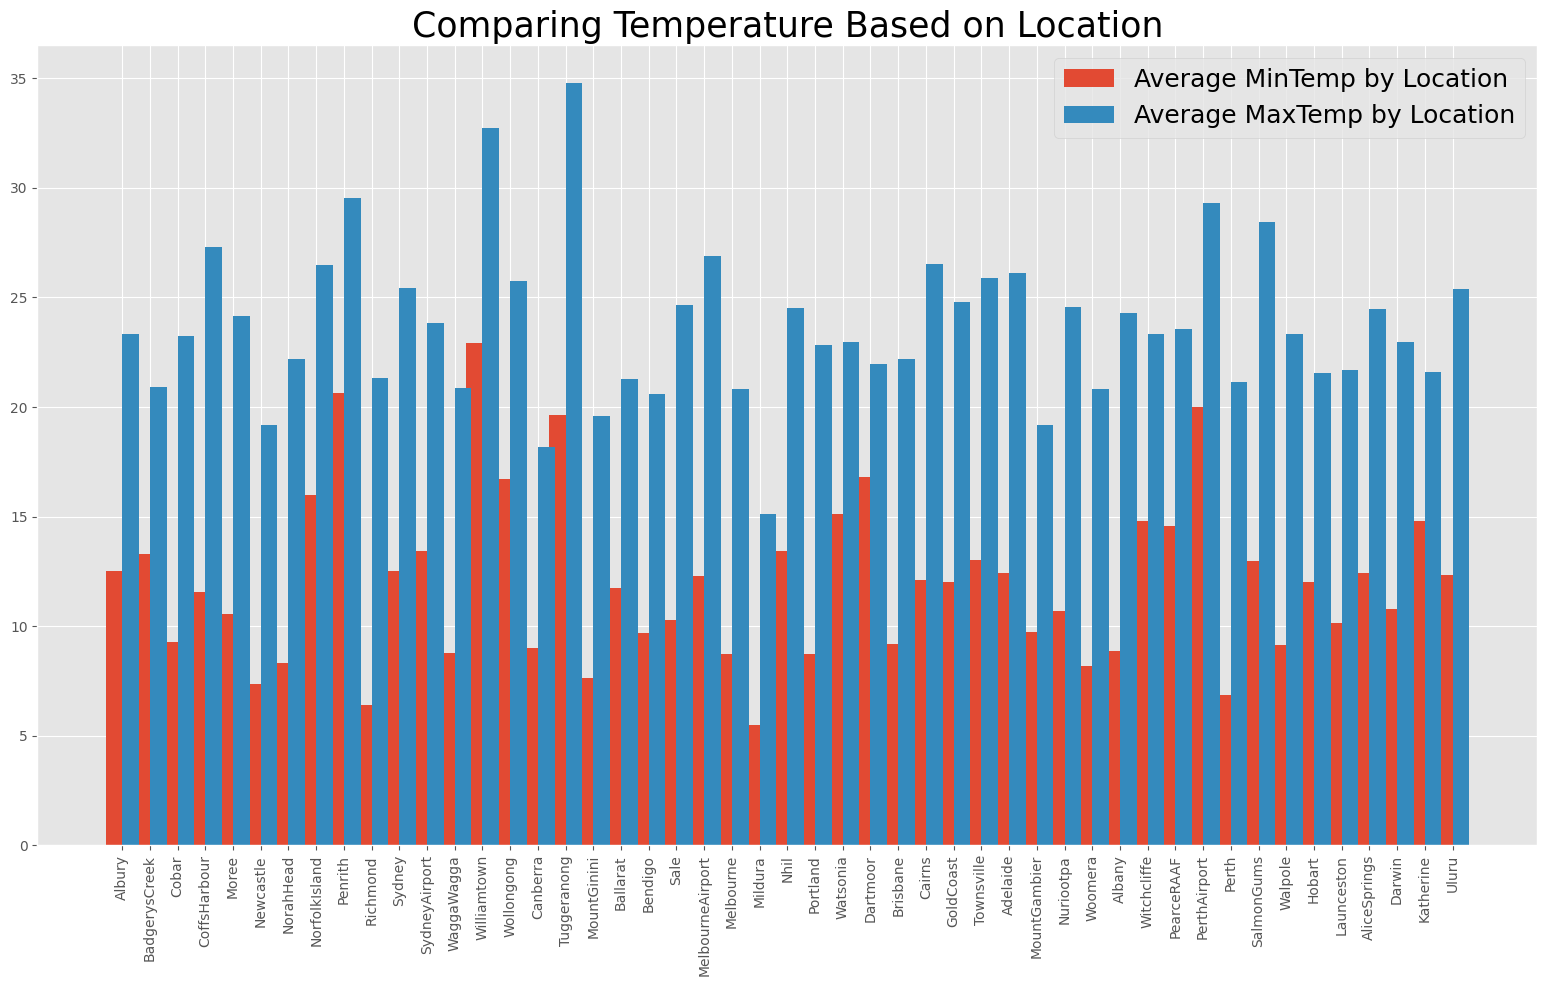

In [150]:
# Membandingkan Temperature berdasarkan Location
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing Temperature Based on Location", fontsize=25)
plt.legend(fontsize=18)
plt.show()

Based on the visualization results, it can be seen that the location with the lowest temperature in Mildura while the highest temperature in Tuggeranong location.

## **F. Data Preprocessing**

Find the correlation between numerical and categorical features with *dython* library

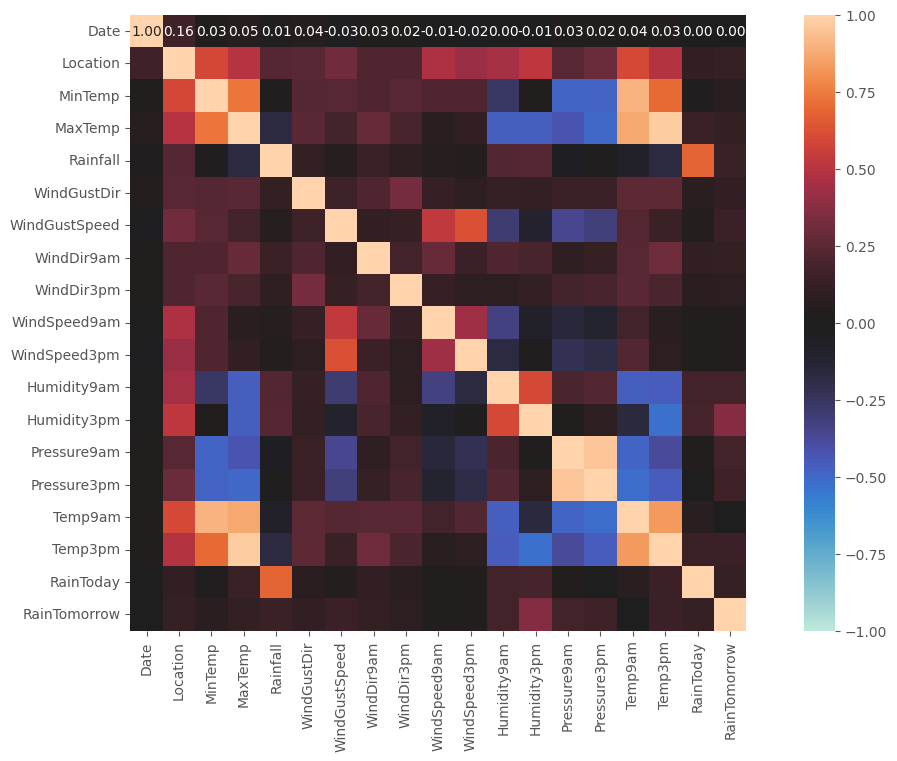

In [151]:
corr = associations(df)

Because we want to know which features that affect the raintomorrow the most and reduce the computational cost as well, we'll sort the correlation coefficients in descending order and take only the top 10. The 
 and 
 signs only indicate the direction of the linear relationship between two variables, thus we can sort by the absolute values of the correlation coefficients to make sorting easier.

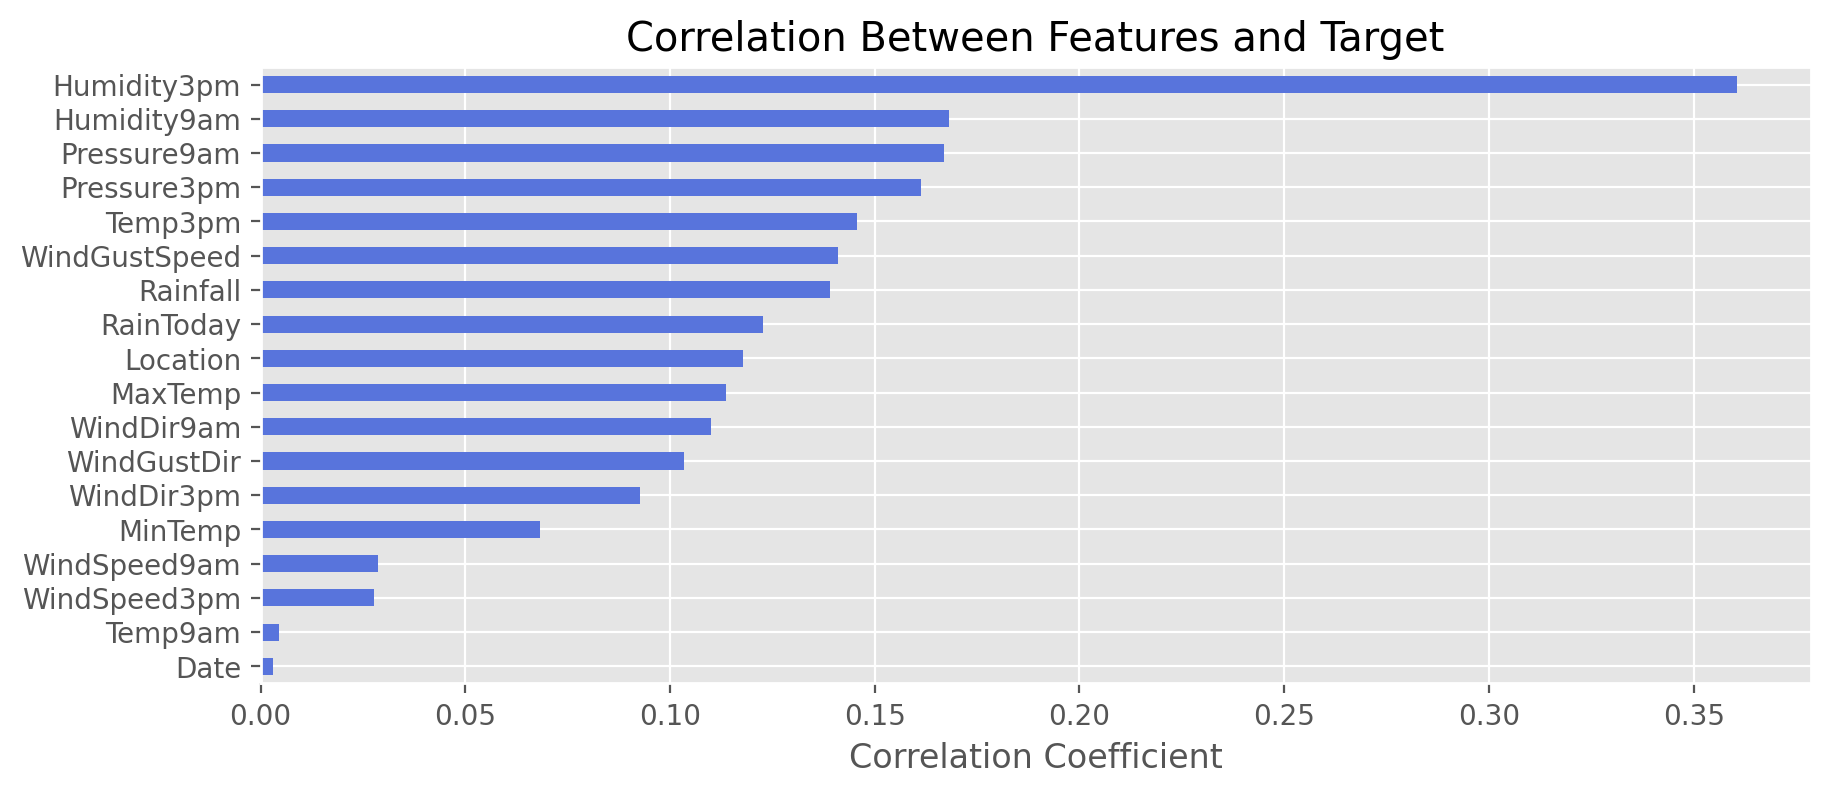

In [152]:
top_10_corr = abs(corr["corr"][["RainTomorrow"]].drop("RainTomorrow")).sort_values("RainTomorrow",ascending=False)

fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("RainTomorrow").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Correlation Between Features and Target")
plt.xlabel("Correlation Coefficient")
plt.show()

We can see the plot of WindSpeed9am, WindSpeed3pm, Temp9am, and Date  have a small correlation with RainTomorrow, so we will drop the columns.

In [153]:
df = df.drop(corr["corr"][["RainTomorrow"]].sort_values("RainTomorrow").iloc[:4].index,axis=1)
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 110073
Number of Columns	: 15


In [154]:
# Because the independent variable has categorical data, LabelEncoder will be done first.
df_categ = df[cat]
for i in cat:
    Lenc = LabelEncoder()
    df_categ[i] = Lenc.fit_transform(df_categ[i])
    df[i] = df_categ[i]

In [155]:
# Define independent variable (X) and dependent variable (y)
x = df.drop("RainTomorrow",axis=1)
y = df["RainTomorrow"]

Split the dataframe into training and testing sets with a ratio of 70:30.

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(f"Training dataset\t: {len(X_train)} ({round(len(X_train) / len(X) * 100)}%)")
print(f"Testing dataset\t\t: {len(X_test)} ({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 77051 (70%)
Testing dataset		: 33022 (30%)


Due to all featues have different scales, we'll standardize them with StandardScaler().

In [157]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## **G. Models Definition and Training**

Prepare a model that will be used to study the logistic regression (log_model) and support vector machine (SVM) (svm_model) relationships between features and a target variable with an emphasis on handling class imbalance, and training the models that has been created


### **Logistic Regression**

In [158]:
# First Modeling of Logistic Regression
lr1 = LogisticRegression(solver='liblinear',penalty='l1', random_state = 42)

In [159]:
# Training first model of logistic regression
lr1.fit(scaled_X_train,y_train)
logpred1 = lr1.predict(scaled_X_test)

# Prediction results
logprob1 = lr1.predict_proba(scaled_X_test)
pd.DataFrame({
    "probability_yes_raintomorrow":logprob1[:,1] * 100,
    "probability_no_raintomorrow":logprob1[:,0] * 100,
    "prediction_raintomorrow":logpred1,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,logpred1)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,15.133284,84.866716,0,0,True
1,2.824692,97.175308,0,0,True
2,26.885138,73.114862,0,0,True
3,8.613951,91.386049,0,0,True
4,28.202890,71.797110,0,0,True
...,...,...,...,...,...
33017,18.625895,81.374105,0,0,True
33018,1.161885,98.838115,0,0,True
33019,3.247686,96.752314,0,0,True
33020,6.137395,93.862605,0,0,True


In [160]:
# Secod Modeling of Logistic Regression (Parameter class_weight="balanced" is used  to deal imbalance prediction)
lr2 = LogisticRegression(solver='liblinear',penalty='l1',class_weight="balanced", random_state = 42)

In [161]:
# Training second model of Logistic Regression
lr2.fit(scaled_X_train,y_train)
logpred2 = lr2.predict(scaled_X_test)

# Akan ditampilkan hasil prediksinya
logprob2 = lr2.predict_proba(scaled_X_test)
pd.DataFrame({
    "probability_yes_raintomorrow":logprob2[:,1] * 100,
    "probability_no_raintomorrow":logprob2[:,0] * 100,
    "prediction_raintomorrow":logpred2,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,logpred2)]
}).reset_index(drop=True)

,probability_yes_raintomorrow,probability_no_raintomorrow,prediction_raintomorrow,actual_raintomorrow,accuracy
0,49.911241,50.088759,0,0,True
1,13.588388,86.411612,0,0,True
2,66.714326,33.285674,1,0,False
3,34.220788,65.779212,0,0,True
4,69.115903,30.884097,1,0,False
...,...,...,...,...,...
33017,55.891835,44.108165,1,0,False
33018,6.215957,93.784043,0,0,True
33019,14.846033,85.153967,0,0,True
33020,28.942342,71.057658,0,0,True


### **Support Vector Machine**

In [162]:
# First Modeling of SVM
svm1 = SVC(kernel='rbf',random_state=42)

In [163]:
# Second Modeling of SVM (Parameter class_weight="balanced" is used to deal inbalance predition)
svm2 = SVC(kernel='rbf',class_weight="balanced",random_state=42)

In [164]:
# Training First Model of SVM
svm1.fit(scaled_X_train,y_train)
svmpred1 = svm1.predict(scaled_X_test)

# The prediction result will be displayed (According to various sources, predict() and predict_proba() in SVM give inconsistent results. Also, predict_proba() only works if the probability = True parameter is used, but this will increase the time to train the model significantly)
pd.DataFrame({
    "prediction_raintomorrow":svmpred1,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,svmpred1)]
}).reset_index(drop=True)

,prediction_raintomorrow,actual_raintomorrow,accuracy
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
33017,0,0,True
33018,0,0,True
33019,0,0,True
33020,0,0,True


In [165]:
# Training second model of Support Vector Machine
svm2.fit(scaled_X_train,y_train)
svmpred2 = svm2.predict(scaled_X_test)

# The prediction result will be displayed (According to various sources, predict() and predict_proba() in SVM give inconsistent results. Also, predict_proba() only works if the probability = True parameter is used, but this will increase the time to train the model significantly)
pd.DataFrame({
    "prediction_raintomorrow":svmpred2,
    "actual_raintomorrow":y_test,
    "accuracy":[True if i == j else False for i,j in zip(y_test,svmpred2)]
}).reset_index(drop=True)

,prediction_raintomorrow,actual_raintomorrow,accuracy
0,0,0,True
1,0,0,True
2,1,0,False
3,0,0,True
4,0,0,True
...,...,...,...
33017,0,0,True
33018,0,0,True
33019,0,0,True
33020,0,0,True


## **H. Models Evaluation**

Create a function to evaluate the models (Confusion Matrix)

In [166]:
def evaluation(y_test,y_pred):
    print(classification_report(y_test,y_pred))

    true_yes = confusion_matrix(y_test,y_pred)[1,1]
    false_yes = confusion_matrix(y_test,y_pred)[1,0]
    true_no = confusion_matrix(y_test,y_pred)[0,0]
    false_no = confusion_matrix(y_test,y_pred)[0,1]

    print(f"True\x1B[3m Yes\x1B[0m\t: {true_yes}\t({round(true_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"False\x1B[3m Yes\x1B[0m\t: {false_yes}\t({round(false_yes / (true_yes + false_yes) * 100,2)}%)")
    print(f"True\x1B[3m No\x1B[0m\t\t: {true_no}\t({round(true_no / (true_no + false_no) * 100,2)}%)")
    print(f"False\x1B[3m No\x1B[0m\t: {false_no}\t({round(false_no / (true_no + false_no) * 100,2)}%)")

    plt.figure(dpi=100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,ax=plt.gca())
    plt.grid(False)
    plt.show()

### **Confusion Matrix - Logistic Regression**

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     27893
           1       0.67      0.28      0.40      5129

    accuracy                           0.87     33022
   macro avg       0.78      0.63      0.66     33022
weighted avg       0.85      0.87      0.84     33022

True Yes	: 1435	(27.98%)
False Yes	: 3694	(72.02%)
True No		: 27195	(97.5%)
False No	: 698	(2.5%)


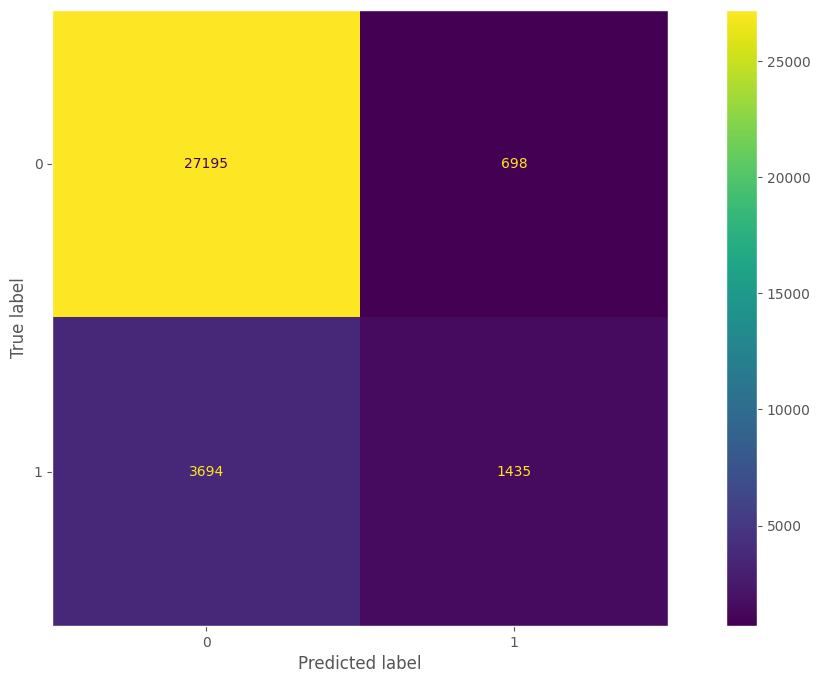

In [167]:
# Pemodelan 1 Logistic Regression
evaluation(y_test,logpred1)

From the results above, it can be seen that the prediction accuracy is quite high at 0.87. The Logistic Regression modeling above produces high accuracy even though the percentage of correct predictions (true Yes and true No) in the confusion matrix is not balanced. Correct predictions in the confusion matrix actually need to be considered for each data case. Where for this rain case, for example in the context of the general public (example: office workers, students, etc.) a high false yes will not be too problematic, compared to if the false no is high.

Because if the false no is high where it is predicted that it will not rain tomorrow but it turns out to rain, then people will get caught in the rain because they did not bring an umbrella or coat. Meanwhile, if the false yes is high, it will not be too problematic because if it is predicted to rain tomorrow but it turns out not to rain, people will not get caught in the rain. Unlike the case if it has entered into a particular industrial sector, it should be noted that the correct predictions in the confusion matrix must be balanced.

              precision    recall  f1-score   support

           0       0.94      0.75      0.83     27893
           1       0.35      0.73      0.47      5129

    accuracy                           0.75     33022
   macro avg       0.64      0.74      0.65     33022
weighted avg       0.85      0.75      0.78     33022

True Yes	: 3749	(73.09%)
False Yes	: 1380	(26.91%)
True No		: 20962	(75.15%)
False No	: 6931	(24.85%)


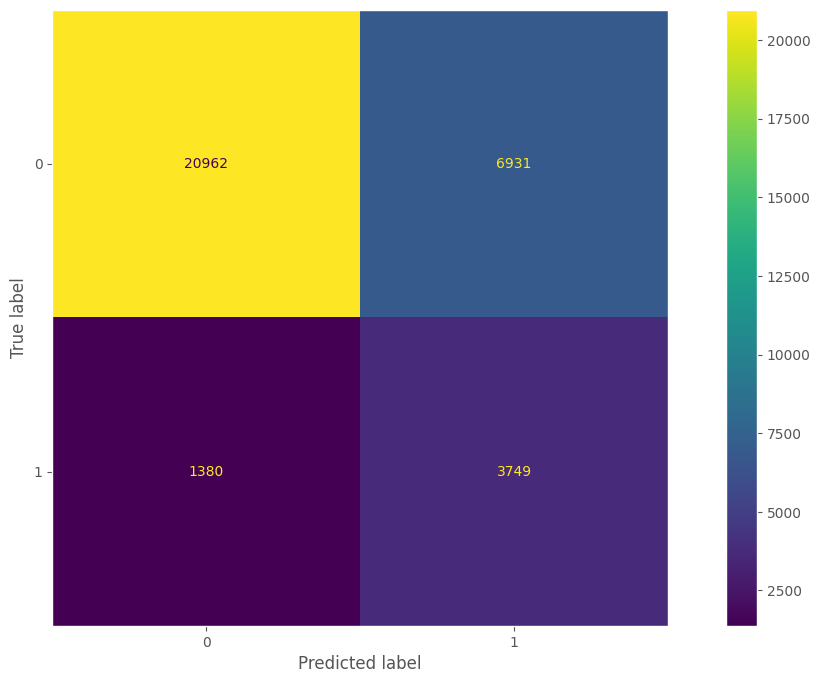

In [168]:
# Pemodelan 2 Logistic Regression
evaluation(y_test,logpred2)

By adding the class_weight="balanced" parameter, Logistic Regression Modeling 2 above has a balanced percentage of correct predictions (true Yes and true No) in the confusion matrix, although the accuracy (0.75) is smaller when compared to Logistic Regression Modeling 1.

This modeling is suitable for certain industries, one example is in the agricultural sector. The agricultural sector needs predictions with a balanced percentage of correct predictions (true Yes and true No) in the confusion matrix, where true yes and true no must be higher than false yes and false no. Because if false yes is high, it will result in land drought which leads to crop failure. Meanwhile, if false no is high, it can cause plants to receive excess water content from rain which also leads to crop failure.

### **Confusion Matrix - Support Vector Machine**

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     27893
           1       0.78      0.25      0.38      5129

    accuracy                           0.87     33022
   macro avg       0.83      0.62      0.65     33022
weighted avg       0.86      0.87      0.84     33022

True Yes	: 1280	(24.96%)
False Yes	: 3849	(75.04%)
True No		: 27522	(98.67%)
False No	: 371	(1.33%)


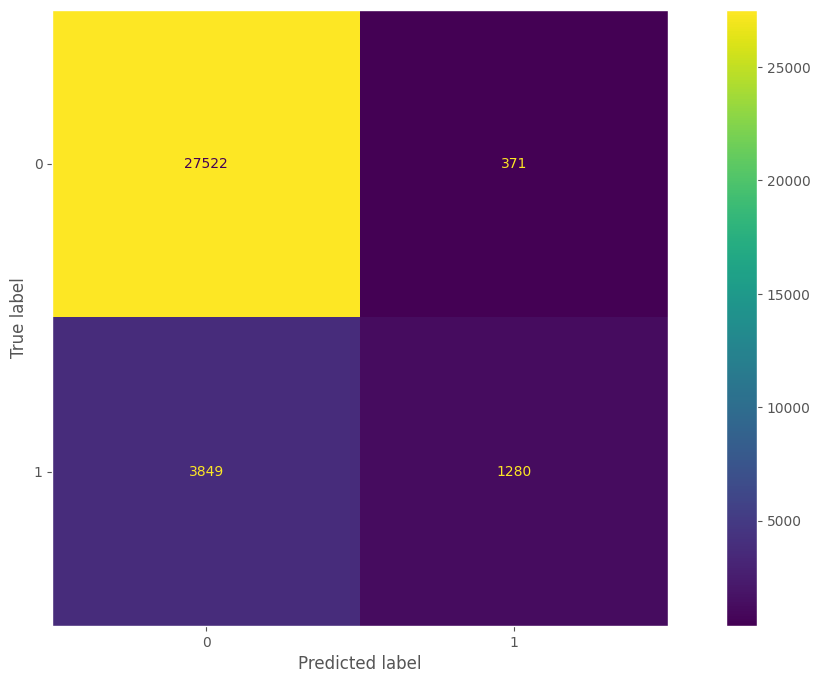

In [169]:
# Pemodelan 1 Support Vector Machine
evaluation(y_test,svmpred1) 

From the results above, it can be seen that the prediction accuracy is quite high at 0.87. Modeling 1 Support Vector Machine above produces high accuracy even though the percentage of correct predictions (true Yes and true No) in the confusion matrix is not balanced. Correct predictions in the confusion matrix actually need to be considered for each data case. Where for this rain case, for example in the context of the general public (example: office workers, students, etc.) a high false yes will not be too problematic, compared to if the false no is high.

Because if the false no is high where it is predicted that it will not rain tomorrow but it turns out to rain, then people will get caught in the rain because they did not bring an umbrella or coat. Meanwhile, if the false yes is high, it will not be too problematic because if it is predicted to rain tomorrow but it turns out not to rain, people will not get caught in the rain. Unlike the case if it has entered into a particular industrial sector, it should be noted that the correct predictions in the confusion matrix must be balanced.

              precision    recall  f1-score   support

           0       0.95      0.78      0.86     27893
           1       0.39      0.76      0.52      5129

    accuracy                           0.78     33022
   macro avg       0.67      0.77      0.69     33022
weighted avg       0.86      0.78      0.80     33022

True Yes	: 3879	(75.63%)
False Yes	: 1250	(24.37%)
True No		: 21844	(78.31%)
False No	: 6049	(21.69%)


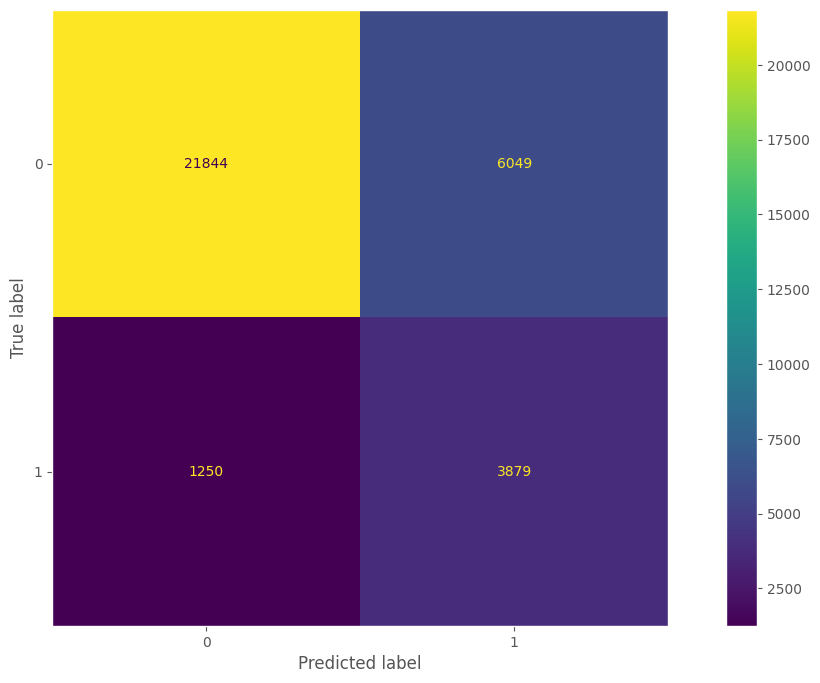

In [170]:
# Pemodelan 2 Support Vector Machine
evaluation(y_test,svmpred2) 

By adding the class_weight="balanced" parameter, Support Vector Machine Modeling 2 above has a balanced percentage of correct predictions (true Yes and true No) in the confusion matrix, although the accuracy (0.78) is smaller when compared to Support Vector Machine Modeling 1.

This modeling is suitable for certain industries, one example is in the agricultural sector. The agricultural sector needs predictions with a balanced percentage of correct predictions (true Yes and true No) in the confusion matrix, where true yes and true no must be higher than false yes and false no. Because if false yes is high, it will result in land drought which leads to crop failure. Meanwhile, if false no is high, it can cause plants to receive excess water content from rain which also leads to crop failure.

### **Models Performance Score (Accuracy, Precision, Recall, and F1 score)**

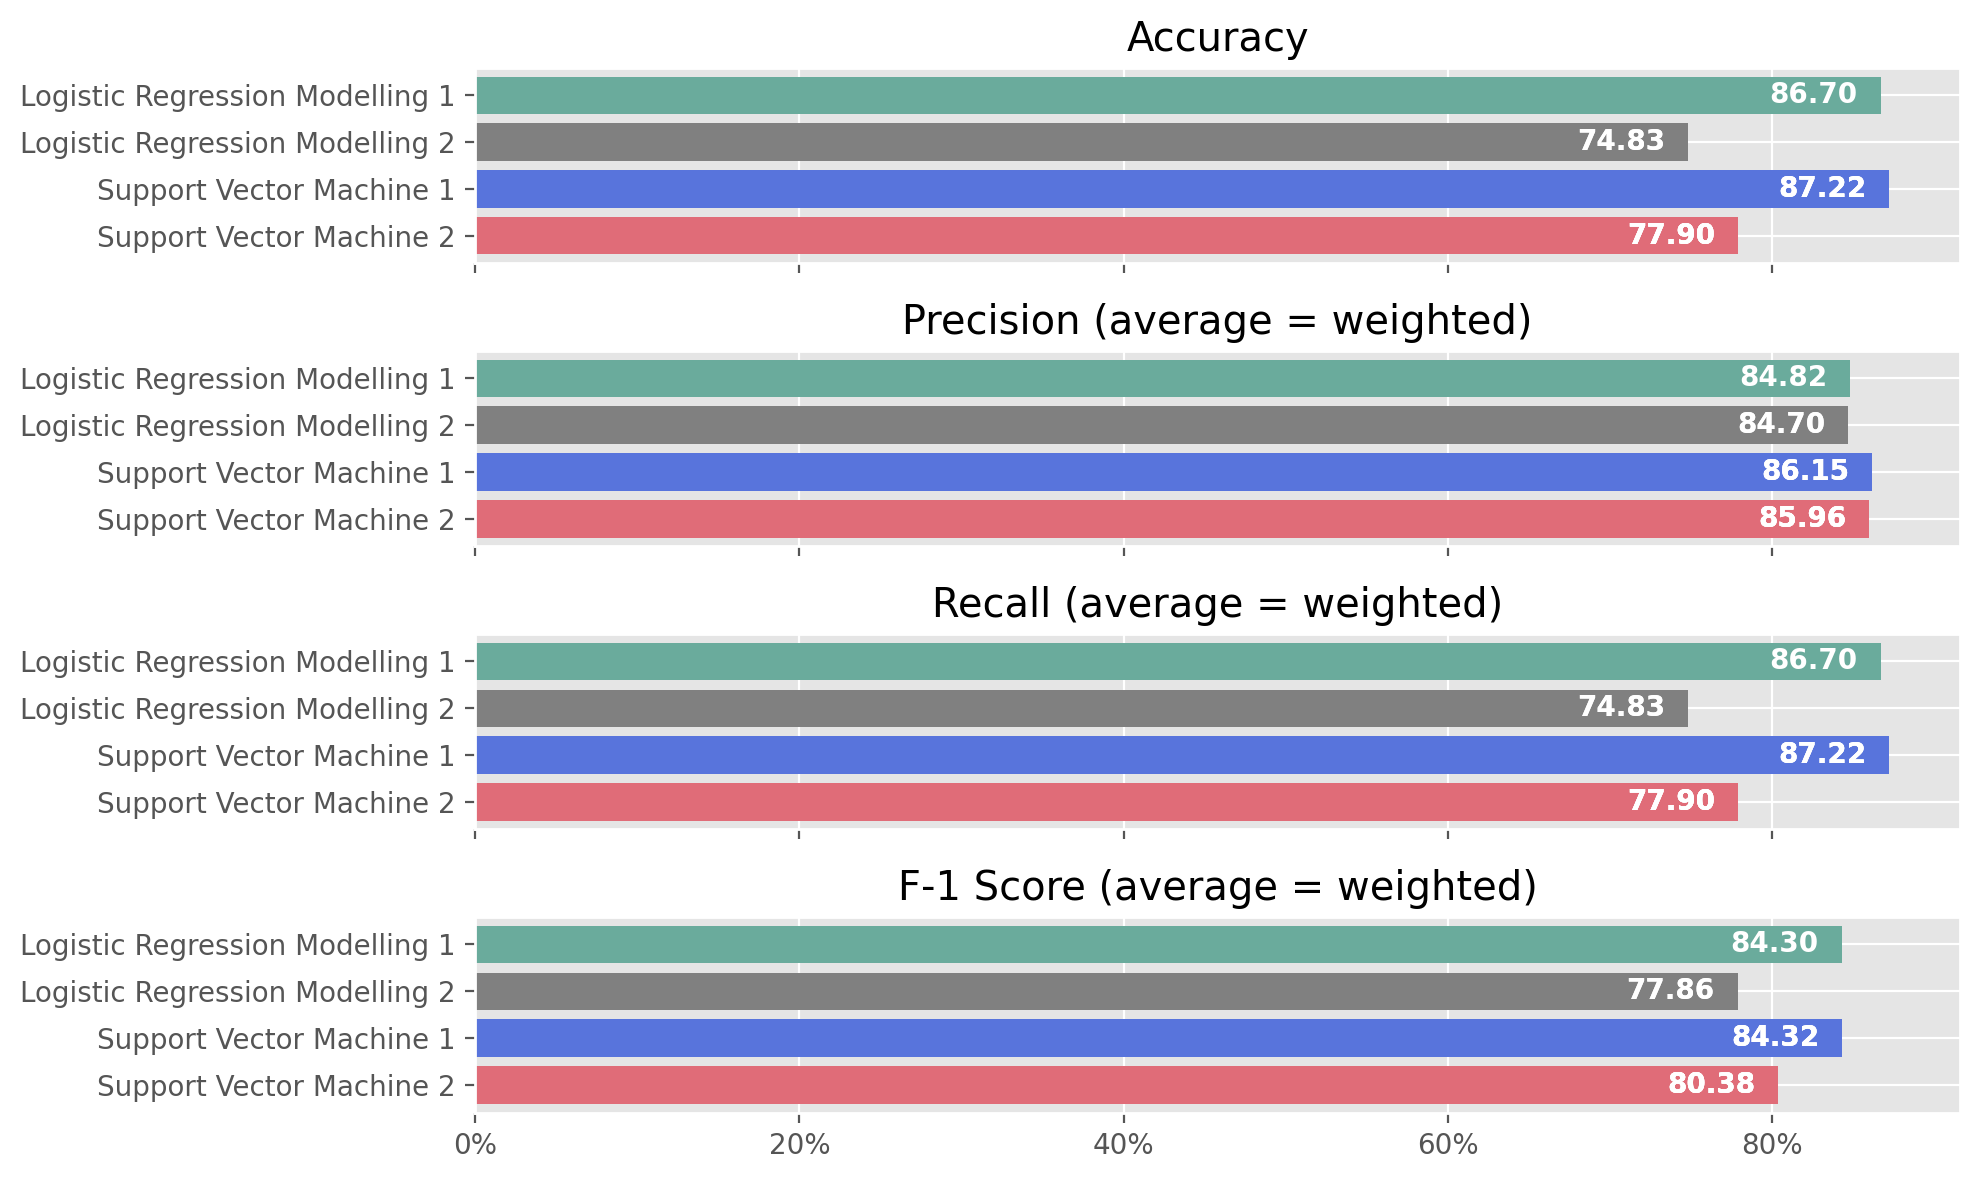

In [171]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [svmpred2,svmpred1,logpred2,logpred1],
        ["Support Vector Machine 2","Support Vector Machine 1","Logistic Regression Modelling 2","Logistic Regression Modelling 1"],
        ["#E06C78","#5874DC","grey","#6AAB9C"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j,average="weighted") * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

Both models have a fairly high score for multiple metrics such as accuracy, precision, recall, and f-1 score. It can also be seen that the SVM model is slightly better than the Logistic Regression model, both (Logistic Regression Modeling 1 vs Support Vector Machine 1) and modeling with the class_weight="balanced" parameter (Logistic Regression Modeling 2 vs Support Vector Machine 2). So the best model to predict rain in Australia is SVM.

### **Comparing Correct and Incorrect Predictions for Each Models**

After evaluating all models, the prediction results will be compared, namely the percentage of correct and incorrect prediction for each model.

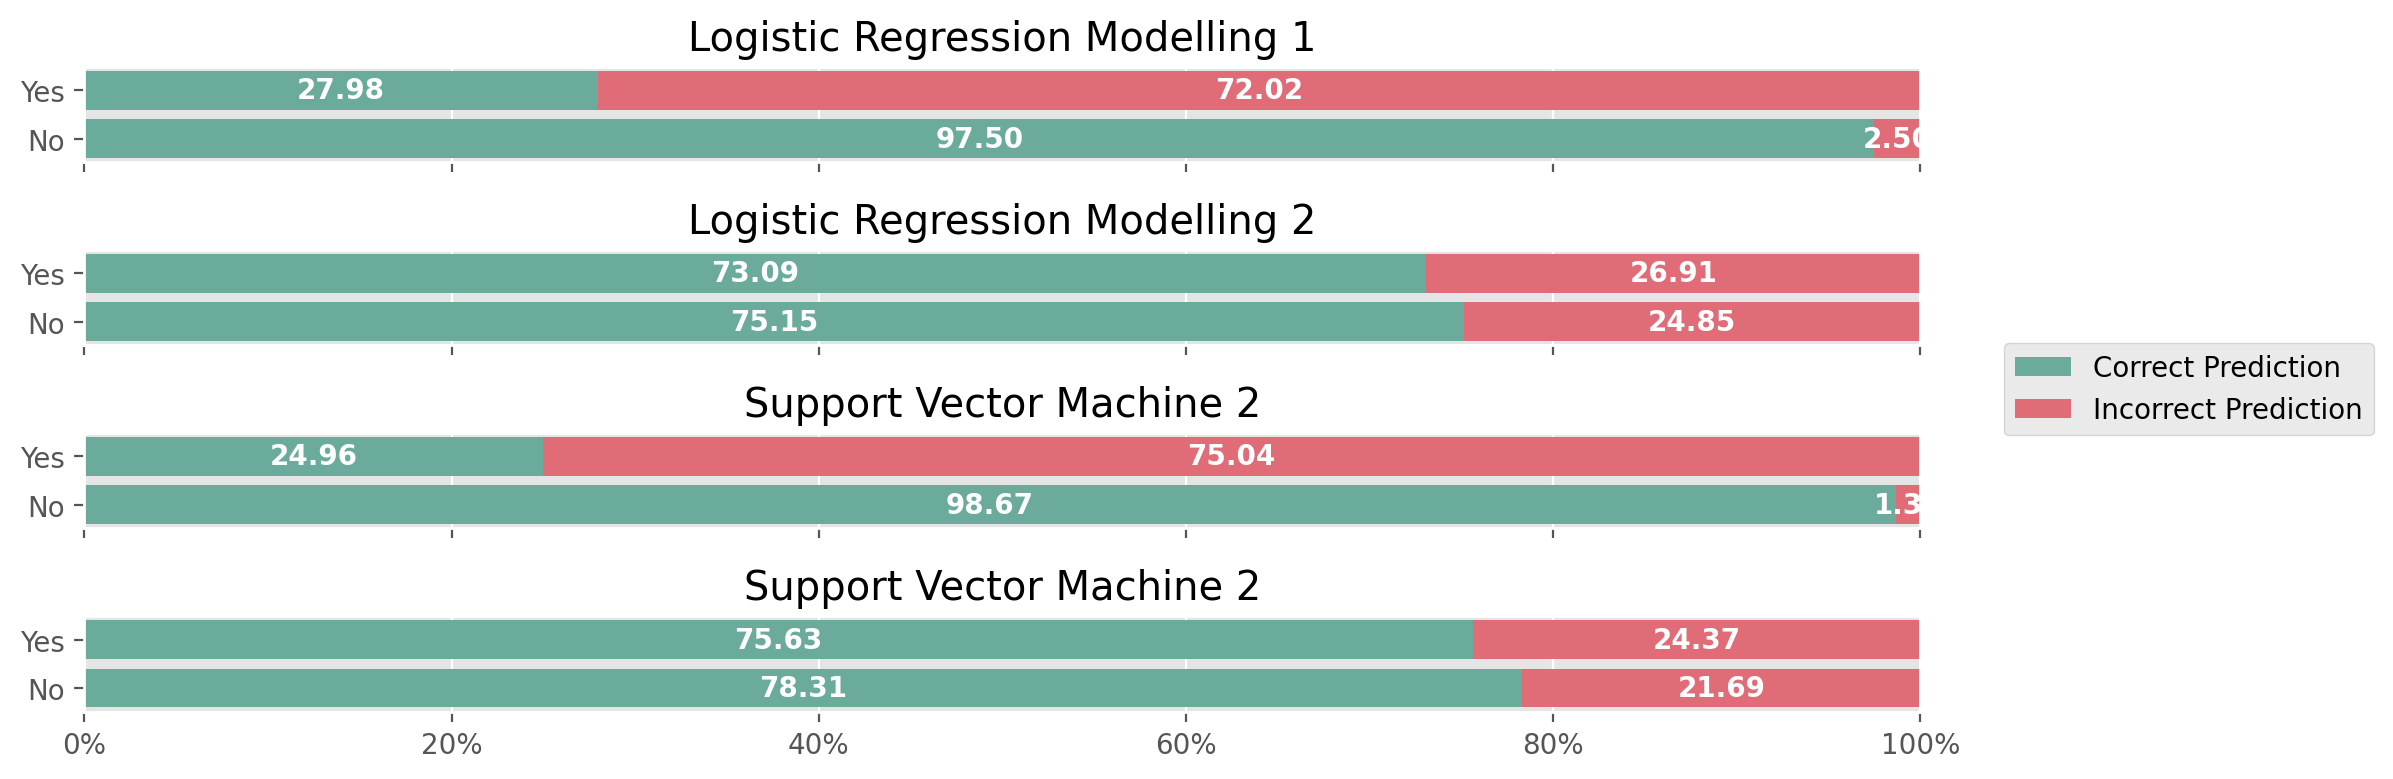

In [172]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),[logpred1,logpred2,svmpred1,svmpred2],["Logistic Regression Modelling 1","Logistic Regression Modelling 2","Support Vector Machine 2","Support Vector Machine 2"]):
    true_yes = confusion_matrix(y_test,j)[1,1]
    false_yes = confusion_matrix(y_test,j)[1,0]
    true_no = confusion_matrix(y_test,j)[0,0]
    false_no = confusion_matrix(y_test,j)[0,1]

    ax[i].barh("No",true_no / (true_no + false_no) * 100,color="#6AAB9C",label="Correct Prediction")
    ax[i].barh("No",false_no / (true_no + false_no) * 100,left=true_no / (true_no + false_no) * 100,color="#E06C78",label="Incorrect Prediction")
    ax[i].barh("Yes",true_yes / (true_yes + false_yes) * 100,color="#6AAB9C")
    ax[i].barh("Yes",false_yes / (true_yes + false_yes) * 100,left=true_yes / (true_yes + false_yes) * 100,color="#E06C78")

    ax[i].set_title(k)
    ax[i].set_xlim(xmax=100)

    for container in ax[i].containers:
        ax[i].bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))
handles,labels = ax[i].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(1,0.5),loc="center left")

plt.tight_layout()
plt.show()

In [173]:
# Pemodelan 1 Logistic Regression
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(lr1.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(lr1.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(1.092178*(Humidity3pm) + 0.050179*(Humidity9am) - 0.028273*(Location) - 0.158132*(MaxTemp) + 0.112903*(MinTemp) - 1.364278*(Pressure3pm) + 0.876516*(Pressure9am) + 0.057083*(RainToday) + 0.092175*(Rainfall) - 0.12974*(Temp3pm) + 0.063569*(WindDir3pm) - 0.081074*(WindDir9am) + 0.029412*(WindGustDir) + 0.409498*(WindGustSpeed) - 2.212802)/(e**(1.092178*(Humidity3pm) + 0.050179*(Humidity9am) - 0.028273*(Location) - 0.158132*(MaxTemp) + 0.112903*(MinTemp) - 1.364278*(Pressure3pm) + 0.876516*(Pressure9am) + 0.057083*(RainToday) + 0.092175*(Rainfall) - 0.12974*(Temp3pm) + 0.063569*(WindDir3pm) - 0.081074*(WindDir9am) + 0.029412*(WindGustDir) + 0.409498*(WindGustSpeed) - 2.212802) + 1))

In [174]:
# Pemodelan 2 Logistic Regression
e,x = sp.Symbol("e"),sp.Symbol("(x)")
x_symbols = [sp.Symbol(f"({i})") for i in X.columns]

sums = np.round(lr2.intercept_[0],6)
for i in range(len(X.columns)):
    sums += x_symbols[i] * np.round(lr2.coef_[0][i],6)

sp.Eq(sp.pi*x,e**sums / (1 + e**sums))

Eq(pi*(x), e**(1.077508*(Humidity3pm) + 0.082189*(Humidity9am) - 0.021625*(Location) - 0.191926*(MaxTemp) + 0.097041*(MinTemp) - 1.432156*(Pressure3pm) + 0.931788*(Pressure9am) + 0.031049*(RainToday) + 0.134678*(Rainfall) - 0.054262*(Temp3pm) + 0.029392*(WindDir3pm) - 0.084222*(WindDir9am) + 0.046753*(WindGustDir) + 0.436607*(WindGustSpeed) - 0.525645)/(e**(1.077508*(Humidity3pm) + 0.082189*(Humidity9am) - 0.021625*(Location) - 0.191926*(MaxTemp) + 0.097041*(MinTemp) - 1.432156*(Pressure3pm) + 0.931788*(Pressure9am) + 0.031049*(RainToday) + 0.134678*(Rainfall) - 0.054262*(Temp3pm) + 0.029392*(WindDir3pm) - 0.084222*(WindDir9am) + 0.046753*(WindGustDir) + 0.436607*(WindGustSpeed) - 0.525645) + 1))

## **I. Models Inference**

In [175]:
# Data baru yang selanjutnya akan dimodelkan
model_inference = {
    "Location":[4, 1, 2, 3],
    'MinTemp': [93, 125, 87, 34],
    'MaxTemp': [152, 77, 58, 46],
    'Rainfall': [75, 36, 141, 40],
    'WindGustDir': [10, 6, 13, 13],
    'WindGustSpeed': [8, 14, 9, 11],
    'WindDir9am': [2, 5, 15, 2],
    'WindDir3pm': [6, 6, 13, 8],
    'Humidity9am': [55, 61, 38, 44],
    'Humidity3pm': [17, 69, 23, 32],
    'Pressure9am': [139, 68, 96, 199],
    'Pressure3pm': [97, 43, 134, 188],
    'Temp3pm': [163, 70, 68, 53],
    'RainToday': [0, 1, 1, 0]
}

# Data yang ada dijadikan DataFrame
model_inference = pd.DataFrame(model_inference)
model_inference

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday
0,4,93,152,75,10,8,2,6,55,17,139,97,163,0
1,1,125,77,36,6,14,5,6,61,69,68,43,70,1
2,2,87,58,141,13,9,15,13,38,23,96,134,68,1
3,3,34,46,40,13,11,2,8,44,32,199,188,53,0


In [176]:
# Melakukan pemodelan terhadap data baru
pred1 = lr1.predict(model_inference)
pred2 = lr2.predict(model_inference)
pred3 = svm1.predict(model_inference)
pred4 = svm2.predict(model_inference)

# Untuk melihat prediksi dari pemodelan yang sudah dibuat terhadap data baru
print("Logistic Regression Model 1 = ",pred1)
print("Logistic Regression Model 2 = ",pred2)
print("Support Virtual Machine Model 1 = ",pred3)
print("Support Virtual Machine Model 1 = ",pred4)

Logistic Regression Model 1 =  [0 1 0 0]
Logistic Regression Model 2 =  [0 1 0 0]
Support Virtual Machine Model 1 =  [0 0 0 0]
Support Virtual Machine Model 1 =  [1 1 1 1]


Save all the models for the future

In [177]:
model = [lr1,lr2,svm1,svm2]
file_name = ["logistic_regression_model1","logistic_regression_model2","support_vector_machine_model1","support_vector_machine_model2"]
extension = "json"

for i,j in zip(model,file_name):
    with open(f"{j}.{extension}","wb") as files:
        dump(i,files)
    print(f"{j}.{extension} has been downloaded")

logistic_regression_model1.json has been downloaded
logistic_regression_model2.json has been downloaded
support_vector_machine_model1.json has been downloaded
support_vector_machine_model2.json has been downloaded


## **J. Conclusion**

Based on the analysis above, it can be seen that both Logistic Regression and SVM models have a fairly high accuracy and both can handle the problem of imbalance prediction (by adding the class_weight="balanced" parameter) well, indicated by a high percentage of correct predictions (true Yes and true No). In addition, both models also have high scores for multiple metrics such as accuracy, precision, recall, and f-1 score. The model to be selected should also be adjusted to its implementation in the field or sector to be applied. Because each model produces a different percentage of correct predictions in the confusion matrix so that it can be a consideration for choosing the model to be used. After the overall analysis, it can be concluded that the best model to predict Rain in Australia is Support Vector Machine.